In [7]:
import json
import jsonschema
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
def create_add(df, col):
    return df.apply(
        lambda row: row[col]-df[
            df["date"]==row["date"] - pd.Timedelta(1, unit='D')
        ][col].max(),
        axis=1
    )

In [9]:
dfs = []
for month in ["2020.08","2020.09","2020.10","2020.11","2020.12","2021.01","2021.02"]:
    with open("data/kpi_hu/{}.json".format(month), 'r') as myfile:
        data_json = json.load(myfile)
        dfs.append(pd.json_normalize(data_json.values()))
df = pd.concat(dfs)
reduced_df = df[["update","tests","infected_pest","infected_other"]].copy()
reduced_df["update"] = pd.to_datetime(reduced_df["update"], format='%Y.%m.%d. %H:%M')
reduced_df["date"] = reduced_df["update"].dt.date
reduced_df["infected"] = reduced_df["infected_pest"]+reduced_df["infected_other"]
reduced_df["add.tests"] = create_add(reduced_df, "tests")
reduced_df["add.infected"] = create_add(reduced_df, "infected")
reduced_df["add.infected/add.tests"] = reduced_df["add.infected"] / reduced_df["add.tests"] * 100
reduced_df.tail()

,update,tests,infected_pest,infected_other,date,infected,add.tests,add.infected,add.infected/add.tests
1,2021-02-02 08:49:00,3176944,14666,73163,2021-02-02,87829,7794.0,-4043.0,-51.873236
2,2021-02-03 08:54:00,3192378,14132,71181,2021-02-03,85313,15434.0,-2516.0,-16.301672
3,2021-02-04 08:45:00,3210549,13808,71040,2021-02-04,84848,18171.0,-465.0,-2.559023
4,2021-02-05 08:53:00,3229242,13611,71259,2021-02-05,84870,18693.0,22.0,0.117691
5,2021-02-06 09:26:00,3246838,13340,70810,2021-02-06,84150,17596.0,-720.0,-4.091839


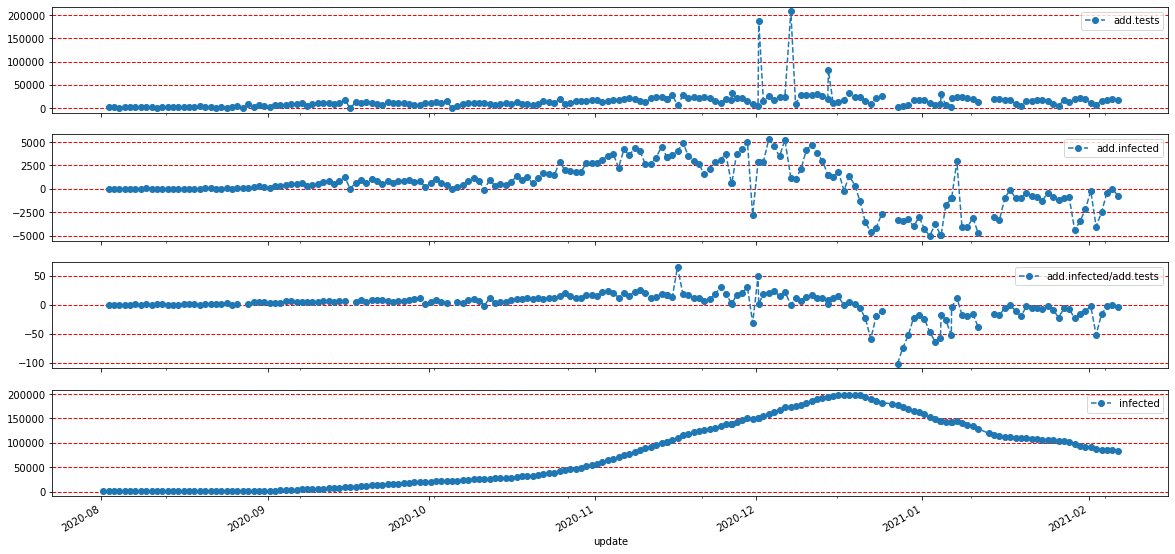

In [10]:
fig, ax = plt.subplots(nrows=4,figsize=(20,10),sharex=True)
#ax[0].set_ylim(0,2100)
#ax[1].set_ylim(1,100)
#ax[1].set_yscale("log")
#ax[2].set_ylim(0,10)
#ax[2].set_yscale("log")
reduced_df.plot(x="update", y="add.tests", ax=ax[0], label="add.tests", style="o--")
reduced_df.plot(x="update", y="add.infected", ax=ax[1], label="add.infected", style="o--")
reduced_df.plot(x="update", y="add.infected/add.tests", ax=ax[2], label="add.infected/add.tests", style="o--")
reduced_df.plot(x="update", y="infected", ax=ax[3], label="infected", style="o--")
ax[0].grid(True, which="both", axis="y", color='r', linestyle='--', linewidth=1)
ax[1].grid(True, which="both", axis="y", color='r', linestyle='--', linewidth=1)
ax[2].grid(True, which="both", axis="y", color='r', linestyle='--', linewidth=1)
ax[3].grid(True, which="both", axis="y", color='r', linestyle='--', linewidth=1)
plt.show()